# –î–æ–º–∞—à–Ω—è—è —Ä–∞–±–æ—Ç–∞ 2. KNN

*–î–µ–¥–ª–∞–π–Ω: 6 –æ–∫—Ç—è–±—Ä—è, 21:00*

### –û—Ü–µ–Ω–∏–≤–∞–Ω–∏–µ –∏ —à—Ç—Ä–∞—Ñ—ã

–ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞—è –æ—Ü–µ–Ω–∫–∞ - 5 –±–∞–ª–ª–æ–≤.

–ù–µ —Å–ø–∏—Å—ã–≤–∞–π—Ç–µ, –∏–Ω–∞—á–µ –≤—Å–µ–º —É—á–∞—Å—Ç–Ω–∏–∫–∞–º –æ–±–Ω—É–ª–∏–º :)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### –ß–∞—Å—Ç—å 1. –ú–æ–π KNN üëí

**–ó–∞–¥–∞–Ω–∏–µ 1.1 (2 –±–∞–ª–ª–∞)** –†–µ–∞–ª–∏–∑—É–π—Ç–µ —Å–≤–æ–π —Å–æ–±—Å—Ç–≤–µ–Ω–Ω—ã–π –∫–ª–∞—Å—Å –¥–ª—è KNN. –°–¥–µ–ª–∞–π—Ç–µ –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –≤—ã–±–æ—Ä–∞ –º–µ—Ç—Ä–∏–∫–∏ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è: –µ–≤–∫–ª–∏–¥–æ–≤–∞ –∏–ª–∏ –º–∞–Ω—Ö—ç—Ç—Ç–∞–Ω—Å–∫–∞—è (—ç—Ç–æ –≤—Å–µ ‚Äî —á–∞—Å—Ç–Ω—ã–µ —Å–ª—É—á–∞–∏ –º–µ—Ç—Ä–∏–∫–∏ [–ú–∏–Ω–∫–æ–≤—Å–∫–æ–≥–æ](https://ru.wikipedia.org/wiki/–†–∞—Å—Å—Ç–æ—è–Ω–∏–µ_–ú–∏–Ω–∫–æ–≤—Å–∫–æ–≥–æ)).


In [2]:
from collections import Counter
from sklearn.base import BaseEstimator

In [3]:
class KNNClassifier(BaseEstimator):
    def __init__(self, n_neighbors: int = 5, p: int = 2) -> None:
        """
        Attributes
        ------
        n_neighbors: int, default=5
            Number of neighbors to use.

        p: int, default=2
            Power parameter for the Minkowski metric. When p = 1, this is
            equivalent to using manhattan_distance (l1), and euclidean_distance
            (l2) for p = 2.
        """
        self.n_neighbors = n_neighbors
        self.p = p

    def fit(self, X: np.ndarray, y: np.ndarray): 
        """
        Fit the k-nearest neighbors classifier from the training dataset.

        Parameters
        ----------
        X: matrix of shape (n_samples, n_features)
            Training data.
        y: array of shape (n_samples,) 
            Target values.

        Returns
        -------
        self : KNNClassifier
            The fitted k-nearest neighbors classifier.
        """
        self.X_train = X
        self.y_train = y
        
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict the class labels for the provided data.
        
        Parameters
        ----------
        X: matrix of shape (n_test_samples, n_features)
            Test samples.

        Returns
        -------
        y: array of shape (n_test_samples,) 
            Predicted class labels for each data sample.
        """
        p_matrix = np.sum(np.abs((X[None, :] - self.X_train[:, None]))**self.p, axis = 2)**(1/self.p)
        neighbors = np.apply_along_axis(lambda x: sorted(x, reverse=False)[:self.n_neighbors], 0, p_matrix)
        indices_neighbors = np.sum(p_matrix == neighbors[:, None], axis = 0)
        return np.apply_along_axis(lambda x: Counter(self.y_train[x==1]).most_common(1)[0][0], 0, indices_neighbors)
    
    
    def get_params(self, deep = True):
        return {"n_neighbors" : self.n_neighbors, "p" : self.p}
    
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

**–ó–∞–¥–∞–Ω–∏–µ 1.2 (1 ¬†–±–∞–ª–ª)** 
–û–±—É—á–∏—Ç–µ —Å–≤–æ–π KNN –¥–ª—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è –Ω–∞–ª–∏—á–∏—è –±–æ–ª–µ–∑–Ω–∏ —Å–µ—Ä–¥—Ü–∞. –î–∞–Ω–Ω—ã–µ –ª–µ–∂–∞—Ç [–∑–¥–µ—Å—å](https://github.com/AsyaKarpova/ml_nes_2020/blob/master/homeworks/heart_hw3.csv).


–û–ø–∏—Å–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö:

- age - age in years

- sex - (1 = male; 0 = female)

- cpchest - pain type

- trestbpsresting - blood pressure (in mm Hg on admission to the hospital)

- cholserum - cholestoral in mg/dl

- fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- restecg - resting electrocardiographic results

- thalach - maximum heart rate achieved

- exang - exercise induced angina (1 = yes; 0 = no)

- oldpeak - ST depression induced by exercise relative to rest

- slope - the slope of the peak exercise ST segment

- ca - number of major vessels (0-3) colored by flourosopy

- thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

- target - the presence of heart disease in the patient (**u should predict**)



–° –ø–æ–º–æ—â—å—é –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏ (–º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å, –Ω–∞–ø—Ä–∏–º–µ—Ä, `GridSearchCV`) –ø–æ–¥–±–µ—Ä–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –¥–ª—è —ç—Ç–æ–π –∑–∞–¥–∞—á–∏ —á–∏—Å–ª–æ —Å–æ—Å–µ–¥–µ–π –∏ –º–µ—Ç—Ä–∏–∫—É —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è. 
–û—Ü–µ–Ω–∏—Ç–µ –∫–∞—á–µ—Å—Ç–≤–æ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ —Å –ª—É—á—à–∏–º –Ω–∞–±–æ—Ä–æ–º –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —Å –ø–æ–º–æ—â—å—é `sklearn.model_selection.cross_val_score`, –≤ –∫–∞—á–µ—Å—Ç–≤–µ –º–µ—Ç—Ä–∏–∫–∏ –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ `accuracy` (`scoring=accuracy`).

In [12]:
# your code
import pandas as pd
url = "https://raw.githubusercontent.com/AsyaKarpova/ml_nes_2020/master/homeworks/heart_hw3.csv"
df = pd.read_csv(url)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [13]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [6]:
X, y = df.to_numpy()[:,:-1], df.to_numpy()[:,-1].flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
estimator = Pipeline([('scaler',  StandardScaler()),
            ('KNN', KNNClassifier())])

In [28]:
clf = GridSearchCV(estimator, param_grid={"KNN__n_neighbors" : np.arange(1, 100), "KNN__p" : [1, 2]}, scoring="accuracy", cv = 2)
clf.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('KNN', KNNClassifier())]),
             param_grid={'KNN__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'KNN__p': [1, 2]},
             scoring='accuracy')

In [29]:
print(clf.best_params_)
print(clf.best_score_)

{'KNN__n_neighbors': 5, 'KNN__p': 1}
0.8140495867768596


In [30]:
accuracy_score(clf.predict(X_test), y_test)

0.8360655737704918

In [31]:
clf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('KNN', KNNClassifier(p=1))])

In [36]:
np.mean(cross_val_score(clf.best_estimator_, X_test, y_test, cv = 3, scoring = "accuracy"))

0.8515873015873016

### –ß–∞—Å—Ç—å 2. –ú–æ–π –†–æ–±–æ—Ç <–∏–º—è> üëí

–í —ç—Ç–æ–º –∑–∞–¥–∞–Ω–∏–∏ –º—ã —Ä–∞—Å—Å–º–æ—Ç—Ä–∏–º —É–ø—Ä–æ—â—ë–Ω–Ω—É—é –∏–¥–µ—é —Ç–æ–≥–æ, –∫–∞–∫ –º–µ—Ç–æ–¥ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π –º–æ–∂–Ω–æ –ø—Ä–∏–º–µ–Ω–∏—Ç—å –ø—Ä–∏ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–∏ –¥–≤–∏–∂–µ–Ω–∏—è —Ä–æ–±–æ—Ç–∞. 

–†–∞—Å—Å–º–æ—Ç—Ä–∏–º —Ä–æ–±–æ—Ç–∞ –Ω–∞ –¥–∏—Å–∫—Ä–µ—Ç–Ω–æ–π –¥–≤—É–º–µ—Ä–Ω–æ–π –ø–ª–æ—Å–∫–æ—Å—Ç–∏, –∫–æ—Ç–æ—Ä—ã–π –∑–∞ –∫–∞–∂–¥—ã–π –º–æ–º–µ–Ω—Ç –¥–∏—Å–∫—Ä–µ—Ç–Ω–æ–≥–æ –≤—Ä–µ–º–µ–Ω–∏ –º–æ–∂–µ—Ç –ø–µ—Ä–µ–¥–≤–∏–Ω—É—Ç—å—Å—è –Ω–∞ –æ–¥–Ω—É –ø–æ–∑–∏—Ü–∏—é –≤–ø—Ä–∞–≤–æ, –≤–ª–µ–≤–æ, –≤–≤–µ—Ä—Ö –∏–ª–∏ –≤–Ω–∏–∑. –ù–∞ –ø–ª–æ—Å–∫–æ—Å—Ç–∏ —Ä–∞–∑–±—Ä–æ—Å–∞–Ω—ã –º–µ—Ç–∫–∏ –æ–¥–Ω–æ–≥–æ –∏–∑ —á–µ—Ç—ã—Ä—ë—Ö –∫–ª–∞—Å—Å–æ–≤, –∞–Ω–∞–ª–∏–∑–∏—Ä—É—è –∫–æ—Ç–æ—Ä—ã–µ —Ä–æ–±–æ—Ç –º–æ–∂–µ—Ç (–Ω–æ –Ω–µ –æ–±—è–∑–∞–Ω) –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞—Ç—å —Å–≤–æ—ë –ø–µ—Ä–µ–º–µ—â–µ–Ω–∏–µ. –ü—É—Å—Ç—å –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–∞ 0 —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç —Å–∏–≥–Ω–∞–ª—É –ø–µ—Ä–µ–º–µ—Å—Ç–∏—Ç—å—Å—è –≤–ø—Ä–∞–≤–æ, –º–µ—Ç–∫–∏ –∫–ª–∞—Å—Å–∞ 1 ‚Äì –≤–ª–µ–≤–æ, –∫–ª–∞—Å—Å–∞ 2 ‚Äì –≤–≤–µ—Ä—Ö, –∫–ª–∞—Å—Å–∞ 3 ‚Äì –≤–Ω–∏–∑. 

–ü–µ—Ä–µ–¥–≤–∏–∂–µ–Ω–∏–µ —Ä–æ–±–æ—Ç–∞ –æ—Å—É—â–µ—Å—Ç–≤–ª—è–µ—Ç—Å—è –ø–æ —Å–ª–µ–¥—É—é—â–µ–º—É –ø—Ä–∞–≤–∏–ª—É: —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é 0.2 —Ä–æ–±–æ—Ç –ø–µ—Ä–µ–¥–≤–∏–Ω–µ—Ç—Å—è –≤–ø—Ä–∞–≤–æ, –∞ —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é 0.8 ‚Äì –æ—Ü–µ–Ω–∏—Ç, –º–µ—Ç–∫–∏ –∫–∞–∫–æ–≥–æ –∫–ª–∞—Å—Å–∞ –ø—Ä–µ–æ–±–ª–∞–¥–∞—é—Ç —Å—Ä–µ–¥–∏ `k` –µ–≥–æ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π, –∏ –ø–µ—Ä–µ–¥–≤–∏–Ω–µ—Ç—Å—è –≤ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏, –Ω–∞ –∫–æ—Ç–æ—Ä–æ–µ —É–∫–∞–∑—ã–≤–∞–µ—Ç –¥–æ–º–∏–Ω–∏—Ä—É—é—â–∏–π –∫–ª–∞—Å—Å. 

–î–ª—è –ª—É—á—à–µ–≥–æ –ø–æ–Ω–∏–º–∞–Ω–∏—è –ø—Ä–æ–∏—Å—Ö–æ–¥—è—â–µ–≥–æ –∏–∑–æ–±—Ä–∞–∑–∏–º –≤–æ–∑–º–æ–∂–Ω–æ–µ –ø–æ–ª–æ–∂–µ–Ω–∏–µ —Ä–æ–±–æ—Ç–∞ –∏ –º–µ—Ç–æ–∫:

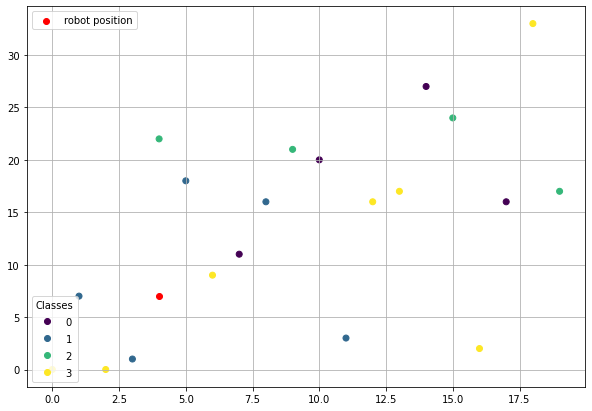

In [38]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) #—Å–≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º —Å–ª—É—á–∞–π–Ω—ã–µ –º–µ—Ç–∫–∏
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

–ù–∞ —Å–ª–µ–¥—É—é—â–µ–º —à–∞–≥–µ —Ä–æ–±–æ—Ç –ø–µ—Ä–µ–¥–≤–∏–Ω–µ—Ç—Å—è –Ω–∞ –µ–¥–∏–Ω–∏—á–∫—É –ª–∏–±–æ –≤–ø—Ä–∞–≤–æ, –ª–∏–±–æ –≤ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏–∏, –∫–æ—Ç–æ—Ä–æ–µ —É–∫–∞–∑—ã–≤–∞—é—Ç –±–ª–∏–∂–∞–π—à–∏–µ —Å–æ—Å–µ–¥–∏.

**–ó–∞–¥–∞–Ω–∏–µ 2.1 (1.5 –±–∞–ª–ª–∞)** –†–µ–∞–ª–∏–∑—É–π—Ç–µ –∫–ª–∞—Å—Å, –∫–æ—Ç–æ—Ä—ã–π –∑–∞–¥–∞—ë—Ç –æ–ø–∏—Å–∞–Ω–Ω–æ–µ –ø–æ–≤–µ–¥–µ–Ω–∏–µ —Ä–æ–±–æ—Ç–∞, –∏—Å–ø–æ–ª—å–∑—É—è —à–∞–±–ª–æ–Ω –Ω–∏–∂–µ:
1. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –∞—Ç—Ä–∏–±—É—Ç—ã `trajectory` (–ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è –∏—Å—Ç–æ—Ä–∏–∏ –ø–µ—Ä–µ–º–µ—â–µ–Ω–∏—è —Ä–æ–±–æ—Ç–∞ –≤ –≤–∏–¥–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ç–æ—á–µ–∫ —Å –¥–≤—É–º—è –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º–∏) –∏ `knn` (–æ–±—É—á–µ–Ω–Ω—ã–π kNN –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä, –∫–æ—Ç–æ—Ä—ã–π –ø–æ –ø–æ–∑–∏—Ü–∏–∏ –º–µ—Ç–∫–∏ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –µ—ë –∫–ª–∞—Å—Å).
2. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –º–µ—Ç–æ–¥ `move()`: —Ä–∞—Å—Å—á–∏—Ç–∞–π—Ç–µ –Ω–æ–≤–æ–µ –ø–æ–ª–æ–∂–µ–Ω–∏–µ —Ä–æ–±–æ—Ç–∞ –ø–æ –ø—Ä–∞–≤–∏–ª–∞–º –≤—ã—à–µ –∏ –¥–æ–±–∞–≤—å—Ç–µ –µ–≥–æ –≤ –∏—Å—Ç–æ—Ä–∏—é –ø–µ—Ä–µ–º–µ—â–µ–Ω–∏–π. 

–ü–æ–¥—Å–∫–∞–∑–∫–∞: –∏—Å—Ö–æ–¥—ã –º–æ–∂–Ω–æ –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å –∫–∞–∫ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –ø–æ–¥–±—Ä–∞—Å—ã–≤–∞–Ω–∏—è –º–æ–Ω–µ—Ç–∫–∏ —Å –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å—é –æ—Ä–ª–∞, —Ä–∞–≤–Ω–æ–π 0.2. –î–ª—è –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏—è —Ç–∞–∫–æ–≥–æ –ø–æ–¥–±—Ä–∞—Å—ã–≤–∞–Ω–∏—è –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å, –Ω–∞–ø—Ä–∏–º–µ—Ä, `np.random.binomial()` —Å –ø—Ä–∞–≤–∏–ª—å–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏.


3. –í–Ω—É—Ç—Ä–∏ —ç—Ç–æ–≥–æ –∫–ª–∞—Å—Å–∞ –≤—ã –º–æ–∂–µ—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Å–≤–æ—é —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é kNN (–µ—Å–ª–∏ —É–≤–µ—Ä–µ–Ω—ã, —á—Ç–æ –æ–Ω–∞ –Ω–æ—Ä–º) –ª–∏–±–æ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—é –∏–∑ sklearn.

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
class MobileRobot:
    def __init__(self, k: int, initial_position: np.ndarray, 
                 landmarks: np.ndarray, 
                 classes: np.ndarray) -> None:
        """
        Attributes
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks,) with class of landmark for each point in landmarks
        
        """
        # Store the history of movements
        self.trajectory = np.array([initial_position])
    
        # Fitted kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k)
        self.knn.fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self) -> None:
        """
        Calculate new position of the robot and add it to the history
        """
        position = None
        last_point = self.trajectory[-1, :]
        
        if(np.random.binomial(n = 1, p = 0.2)):
            position = last_point + self.mapping[0]
        else:
            label = self.knn.predict([last_point])[0]
            position = last_point + self.mapping[label]
            
            
        self.trajectory = np.append(self.trajectory, position[None, :], axis = 0)
            

**–ó–∞–¥–∞–Ω–∏–µ 2.2 (0.5 –±–∞–ª–ª–∞)** –î–æ–ø–æ–ª–Ω–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é `conduct_experiment`: –æ–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é `traj` —Ç–∞–∫, —á—Ç–æ–±—ã –æ–Ω–∞ —Å–æ–¥–µ—Ä–∂–∞–ª–∞ –∏—Å—Ç–æ—Ä–∏—é –ø–µ—Ä–µ–º–µ—â–µ–Ω–∏—è —Ä–æ–±–æ—Ç–∞ –≤ –≤–∏–¥–µ –¥–≤—É–º–µ—Ä–Ω–æ–≥–æ –º–∞—Å—Å–∏–≤–∞ numpy, –≤ –∫–æ—Ç–æ—Ä–æ–º —Å—Ç–æ–ª–±—Ü—ã —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—Ç –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞–º x –∏ y —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–π –ø–æ–∑–∏—Ü–∏–∏.

In [155]:
def conduct_experiment(x,
                       mean=0,
                       std=2, 
                       n_movements=10, 
                       k=3, 
                       initial_position=np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

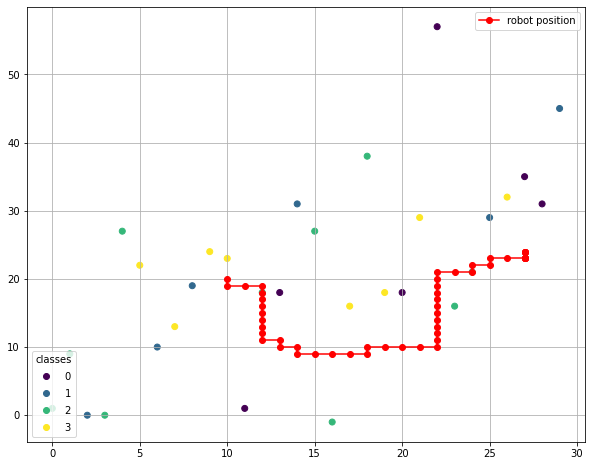

In [156]:
x = np.arange(30)
conduct_experiment(x, mean=3, std=10, k=5, n_movements=50)

**–ó–∞–¥–∞–Ω–∏–µ 2.3 (0.01 –±–∞–ª–ª)** –ü–æ—Ä–∞–¥—É–π—Ç–µ –∞—Å—Å–∏—Å—Ç–µ–Ω—Ç–∞ —Å—Å—ã–ª–∫–æ–π –Ω–∞ —Å–≤–æ–π –ª—é–±–∏–º—ã–π —Ñ–∏–ª—å–º/—Å–µ—Ä–∏–∞–ª/–ø–ª–µ–π–ª–∏—Å—Çüëí